Problem 4, part (a)


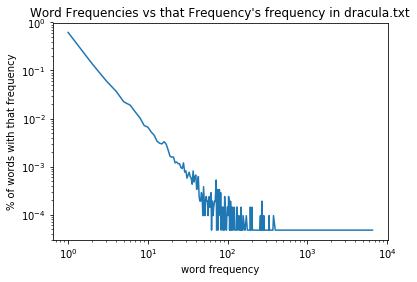

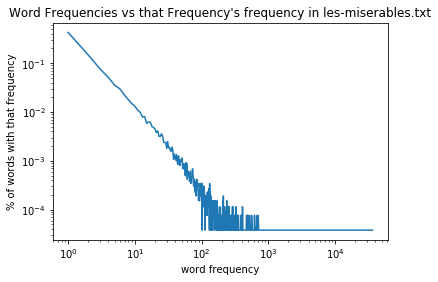

In [195]:

#this is heavily based on code from 
#https://www.digitalocean.com/community/tutorials/how-to-graph-word-frequency-using-matplotlib-with-python-3
#I am not familiar with python, so I am using this as a guide- A
import matplotlib.pyplot as plt
import sys
import operator
import argparse


def main(word2, filename2):
#this just opens the file-A
    try:
        open(filename2)
    except FileNotFoundError:

        # Custom error print
        sys.stderr.write("Error: " + filename2 + " does not exist!")
        sys.exit(1)

    r = word_freq(word2, filename2)
    return r

#this counts how often a particular word apears in the document-A
def word_freq(word, filename):
    doc = {} #the dictionary of frequencies- A

    for line in open(filename):

        # Assume each word is separated by a space
        #This will go through a line of text, and either incrament that word in the dictionary
        #or create a new entry depending on if the word has been encountered before -A
        split = line.split(' ')
        for entry in split:
            if (doc.__contains__(entry)):
                doc[entry] = int(doc.get(entry)) + 1
            else:
                doc[entry] = 1

    #This part is useless to me, I do not want the user to have to give a particular word -A
    #if (word not in doc):
        #sys.stderr.write("Error: " + word + " does not appear in " + filename)
        #sys.exit(1)

    #this sorts the dictionary in reverse order... look into what [:: -1] does!
    #it reverses the sorted list, so what you get is the highest t least order -A
    sorted_doc = (sorted(doc.items(), key=operator.itemgetter(1)))[::-1]
    just_the_occur = []
    just_the_rank = []
    #yax is to get the y axis for this asignment, which should be the number of words 
    #with that frequency / total...
    #the easiest way to do this would be after all occurrances are counted, to count the number of times each 
    #happens and then divide by the length of occurances
    yax = []
    #word_rank = 0
    #word_frequency = 0

    entry_num = 1
    #This goes through the sorted dictoinary of words and frequencies.-A 
    for entry in sorted_doc:

        #I think this again just pretains to giving the info for a particular word, not of use to me -A
        #if (entry[0] == word):
        #    word_rank = entry_num
        #    word_frequency = entry[1]

        just_the_rank.append(entry_num) #this is how rank is built, from who is most frequent- A
        entry_num += 1
        just_the_occur.append(entry[1])

    #I want the x-axis to be frequency of a word, y-axis to be the fraction of distinct words 
    #in the text that have that frequency -A
    
    #now, here to build the y axis values from the number of occurances:
    for i in just_the_occur:
        #count how many times this i frequency happens
        c =  just_the_occur.count(i)/len(just_the_occur) 
        yax.append(c)
        
        
    plt.title("Word Frequencies vs that Frequency's frequency in " + filename)
    plt.ylabel("% of words with that frequency")
    plt.xlabel("word frequency")
    #plt.xlabel("Rank of word(\"" + word + "\" is rank " + str(word_rank) + ")")
    #This was plt.loglog(just_the_rank, just_the_occur, basex=10)
    #as in rank x, frequency y
    #instead I want x frequency, y number with that frequency/ total
    plt.loglog(just_the_occur, yax, basex=10)
    #This is just for plotting that particular word, no use to me -A
    #plt.scatter(
    #    [word_rank],
    #    [word_frequency],
    #    color="orange",
    #    marker="*",
    #    s=100,
    #    label=word
    #)
    plt.show()
    return yax

if __name__ == "__main__":
    print("Problem 4, part (a)")
    x2 = main("Mina","dracula.txt")
    print("\n\n")
    x = main("le", "les-miserables.txt")
    
    #print(list(x))



In [32]:
print('b)\nThe total area under the probability curve is 1. So, to find the probability that a vaule is greater than or equal to x we should take the integral of the pdf. In this integral, the lower limit is x, with the upper being the maximum in the domain we intend to consider. This is CS, so it probaly wont be to infinity...\nThen, integrating in terms of x and treatin alpha,x-min as constants:\n')


b)
The total area under the probability curve is 1. So, to find the probability that a vaule is greater than or equal to x we should take the integral of the pdf. In this integral, the lower limit is x, with the upper being the maximum in the domain we intend to consider. This is CS, so it probaly wont be to infinity...
Then, integrating in terms of x and treatin alpha,x-min as constants:



In [33]:
print('As in, after some calc, we get x-min^(a-1)*(-1/x^(a-1))')
print('The work is included as a seprate image, I can\'t get it to show here')

As in, after some calc, we get x-min^(a-1)*(-1/x^(a-1))
The work is included as a seprate image, I can't get it to show here


c)
Estimate alpha. On a log-log, power law should be a straight line with -alpha as a slope. In the books, for 10^0 to 10^1 this looks true.
Here x, is the probability of a word having a particular frequency.


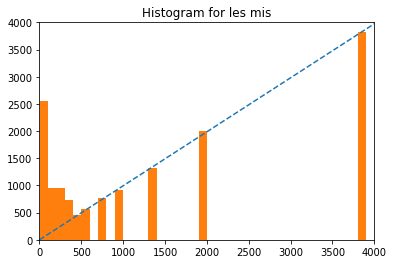

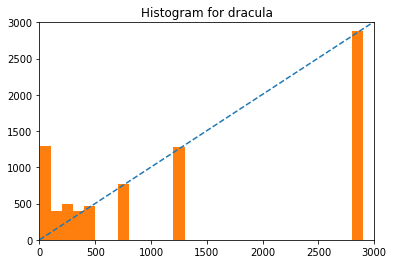

These are normal histograms on the percent of the time a word appears with a certain frequency.The tails looks linear- if sparse. 


In [133]:
print('c)\nEstimate alpha. On a log-log, power law should be a straight line with -alpha as a slope. In the books, for 10^0 to 10^1 this looks true.')
print('Here x, is the probability of a word having a particular frequency.')

import numpy as np
y = 0.9932895615401737*bins
plt.plot(bins, y, '--')

#get the histrogram for x:
#les mis
lm = list(map(lambda j: int(j*len(x)),x))
n, bins, patches = plt.hist(lm,bins=range(min(lm), max(lm) + 10, 100))
plt.title("Histogram for les mis")
plt.xlim([0,4000])
plt.ylim([0,4000])
plt.show()
# add a 'best fit' line


#dracula
y = 1.0038147337709697*bins
plt.plot(bins, y, '--')

dr = list(map(lambda j: int(j*len(x2)),x2))
n2, bins2, patches2 = plt.hist(dr,bins=range(min(dr), max(dr) + 10, 100))
plt.title("Histogram for dracula")
plt.xlim([0,3000])
plt.ylim([0,3000])
plt.show()


print('These are normal histograms on the percent of the time a word appears with a certain frequency.The tails looks linear- if sparse. ')

In [126]:
#inorder to only regress on the not empty bins
lmh =  list(filter(lambda x: x[0] > 0, list(zip(n,bins))))
#in order to only look at the line like tail
lmh =  list(filter(lambda x: x[1] > 500, lmh))
print('For Les Mis\npart of histogram considered (center,count):')
print(list(lmh))
LM = list(map(list, zip(*lmh)))         # keep it a generator

m,b = np.polyfit(LM[1], LM[0], 1) 
print('gives slope ', m,'this is -a')


For Les Mis
part of histogram considered (center,count):
[(575.0, 501), (766.0, 701), (916.0, 901), (1326.0, 1301), (1994.0, 1901), (3826.0, 3801)]
gives slope  0.9932895615401737 this is -a


In [131]:
#inorder to only regress on the not empty bins
drh =  list(filter(lambda x: x[0] > 0, list(zip(n2,bins2))))
#in order to only look at the line like tail
drh =  list(filter(lambda x: x[1] > 400, drh))
print('For Drac\npart of histogram considered (center,count):')
print(list(drh))
DR = list(map(list, zip(*drh)))         # keep it a generator

m2,b2 = np.polyfit(DR[1], DR[0], 1) 
print('gives slope ', m2,'this is -a')


For Drac
part of histogram considered (center,count):
[(463.0, 401), (768.0, 701), (1274.0, 1201), (2874.0, 2801)]
gives slope  1.0038147337709697 this is -a


d)
Same for ccdf. Get the ccdf by taking the sum of all x above for ech entry.



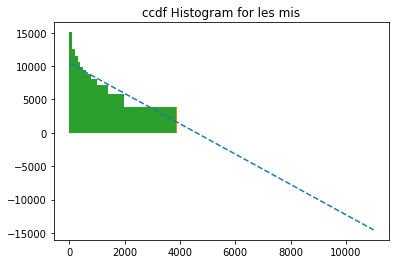

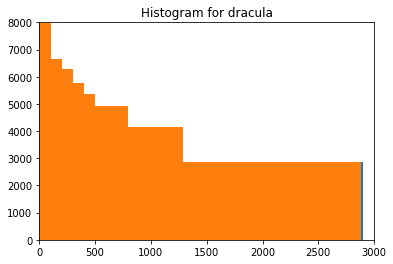

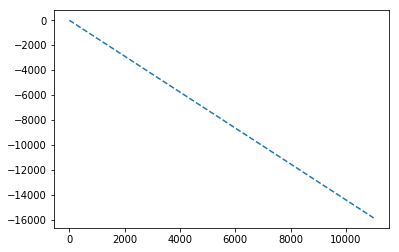

In [190]:
print('d)\nSame for ccdf. Get the ccdf by taking the sum of all x above for ech entry.\n')



y = -2.2708076923076916*bins +10444.34388461538 
plt.plot(bins, y, '--')

#get the histrogram for x:
#les mis
lm = list(map(lambda j: int(j*len(x)),x))
n, bins3, patches3 = plt.hist(lm,bins=range(min(lm), max(lm) + 10, 100))
#from this originial list, you would want each entry to become the sum of all the elements above it
#so n should have each entry become the sum of the subarray from index n to end:
import functools as fun
n3 =list(map((lambda x:fun.reduce((lambda t, j: t + j), n[x[0]:] )), enumerate(n3)))
#print(n3) 
bins3 = list(bins3)
del bins3[-1:]
plt.hist(bins3,len(n3), weights=n3)
plt.title("ccdf Histogram for les mis")
plt.show()
plt.xlim([0,4000])
plt.ylim([0,14000])
# add a 'best fit' line


#dracula
y = -1.4423546798029567*bins


dr = list(map(lambda j: int(j*len(x2)),x2))
n2, bins4, patches4 = plt.hist(dr,bins=range(min(dr), max(dr) + 10, 100))
n4 =list(map((lambda x:fun.reduce((lambda t, j: t + j), n2[x[0]:] )), enumerate(n2)))
#print(n4) 
bins4 = list(bins4)
del bins4[-1:]
plt.hist(bins4,len(n4), weights=n4)
plt.title("Histogram for dracula")
plt.xlim([0,3000])
plt.ylim([0,8000])

plt.show()

plt.plot(bins, y, '--')

In [191]:
print('this is the best you will get, in anything else the fit line gets covered up. \nthen to fit alpha\n')

this is the best you will get, in anything else the fit line gets covered up. 
then to fit alpha



In [194]:
#inorder to only regress on the not empty bins
drh2 =  list(filter(lambda x: x[0] > 0, list(zip(n4,bins4))))
#in order to only look at the line like tail
#drh =  list(filter(lambda x: x[1] > 400, drh))
print('For Drac\npart of histogram considered (center,count):')
print(list(drh2))
DR2 = list(map(list, zip(*drh2)))         # keep it a generator

m3,b3 = np.polyfit(DR2[1], DR2[0], 1) 
print('\ngives slope ', m3,'this is -a')


For Drac
part of histogram considered (center,count):
[(7966.0, 1), (6667.0, 101), (6270.0, 201), (5775.0, 301), (5379.0, 401), (4916.0, 501), (4916.0, 601), (4916.0, 701), (4148.0, 801), (4148.0, 901), (4148.0, 1001), (4148.0, 1101), (4148.0, 1201), (2874.0, 1301), (2874.0, 1401), (2874.0, 1501), (2874.0, 1601), (2874.0, 1701), (2874.0, 1801), (2874.0, 1901), (2874.0, 2001), (2874.0, 2101), (2874.0, 2201), (2874.0, 2301), (2874.0, 2401), (2874.0, 2501), (2874.0, 2601), (2874.0, 2701), (2874.0, 2801)]

gives slope  -1.4423546798029567 this is -a


In [193]:
#inorder to only regress on the not empty bins
lmh2 =  list(filter(lambda x: x[0] > 0, list(zip(n3,bins3))))
#in order to only look at the line like tail
#lmh =  list(filter(lambda x: x[1] > 500, lmh))
print('For Les Mis\npart of histogram considered (center,count):')
print(list(lmh2))
LM2 = list(map(list, zip(*lmh2)))         # keep it a generator

m4,b4 = np.polyfit(LM2[1], LM2[0], 1) 
print('\ngives slope ', m4,'this is -a')


For Les Mis
part of histogram considered (center,count):
[(15067.0, 1), (12511.0, 101), (11552.0, 201), (10595.0, 301), (9868.0, 401), (9403.0, 501), (8828.0, 601), (8828.0, 701), (8062.0, 801), (8062.0, 901), (7146.0, 1001), (7146.0, 1101), (7146.0, 1201), (7146.0, 1301), (5820.0, 1401), (5820.0, 1501), (5820.0, 1601), (5820.0, 1701), (5820.0, 1801), (5820.0, 1901), (3826.0, 2001), (3826.0, 2101), (3826.0, 2201), (3826.0, 2301), (3826.0, 2401), (3826.0, 2501), (3826.0, 2601), (3826.0, 2701), (3826.0, 2801), (3826.0, 2901), (3826.0, 3001), (3826.0, 3101), (3826.0, 3201), (3826.0, 3301), (3826.0, 3401), (3826.0, 3501), (3826.0, 3601), (3826.0, 3701), (3826.0, 3801)]

gives slope  -2.2708076923076916 this is -a


In [210]:
print('e)\nUse the Max Likelihood Estimator to estimate alpha\nfor Les Mis\na=',lmMLE)
#for x being the data (word counts? part a's x lm and x2 dr) take the natural log of all elements and sum them
#divide the number of elements by this
#then add 1
import math
lmMLE =len(x)/fun.reduce(lambda f,j:f+j, list(map(lambda i: math.log(i),x))) +1


e)
Use the Max Likelihood Estimator to estimate alpha
for Les Mis
a= 0.6100710015950561


In [214]:
print('e)\nUse the Max Likelihood Estimator to estimate alpha')
#for x being the data (word counts? part a's x lm and x2 dr) take the natural log of all elements and sum them
#divide the number of elements by this
#then add 1
import math
drMLE =len(x2)/fun.reduce(lambda f,j:f+j, list(map(lambda i: math.log(i),x2))) +1
print('\nfor Drac\na=',drMLE, '\nThese both are so diffrent than the prior part...\neither the histogram approximation is very bad or my work is very bad :(')


e)
Use the Max Likelihood Estimator to estimate alpha

for Drac
a= 0.4012982749180688 
These both are so diffrent than the prior part...
either the histogram approximation is very bad or my work is very bad :(
